# Explore the dataset


In this notebook, we will perform an EDA (Exploratory Data Analysis) on the processed Waymo dataset (data in the `processed` folder). In the first part, you will create a function to display 

In [9]:
from utils import get_dataset
from enum import Enum
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from matplotlib.patches import Rectangle

%matplotlib inline

In [10]:
dataset = get_dataset("/home/workspace/data/waymo/training_and_validation/*.tfrecord")

INFO:tensorflow:Reading unweighted datasets: ['/home/workspace/data/waymo/training_and_validation/*.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['/home/workspace/data/waymo/training_and_validation/*.tfrecord']
INFO:tensorflow:Number of filenames to read: 97


## Write a function to display an image and the bounding boxes

Implement the `display_instances` function below. This function takes a batch as an input and display an image with its corresponding bounding boxes. The only requirement is that the classes should be color coded (eg, vehicles in red, pedestrians in blue, cyclist in green).

In [27]:
def display_instances(batch):
    """
    This function takes a batch from the dataset and display the image with 
    the associated bounding boxes.
    """
    # ADD CODE HERE
        
    
    class Classes(Enum):
        CAR = 1
        PEDESTRIAN = 2
        BICYCLE = 4
    classes_color = {Classes.CAR.value: [1, 0, 0], Classes.PEDESTRIAN.value: [0, 1, 0], Classes.BICYCLE.value: [0, 0, 1]}
    
    fig, ax = plt.subplots(2, 5, figsize=(10, 5))

    data_counter=0
    
    for data in batch:
        x = data_counter % 2
        y = data_counter % 5
                
        ax[x, y].imshow(data['image'])
        ax[x ,y].axis('off')
        
        image_height = data['image'].shape[0]
        image_width = data['image'].shape[1]
        
        for cl, bounding_box in zip(data['groundtruth_classes'].numpy(), data['groundtruth_boxes'].numpy()):
            y1, x1, y2, x2 = bounding_box
            y1 *= image_height
            x1 *= image_width
            y2 *= image_height
            x2 *= image_width            
            
            rec = Rectangle((x1, y1), x2-x1, y2-y1, facecolor='none', edgecolor=classes_color[cl])
            ax[x, y].add_patch(rec)
             
        data_counter += 1
        
    plt.tight_layout()
    plt.show()

## Display 10 images 

Using the dataset created in the second cell and the function you just coded, display 10 random images with the associated bounding boxes. You can use the methods `take` and `shuffle` on the dataset.

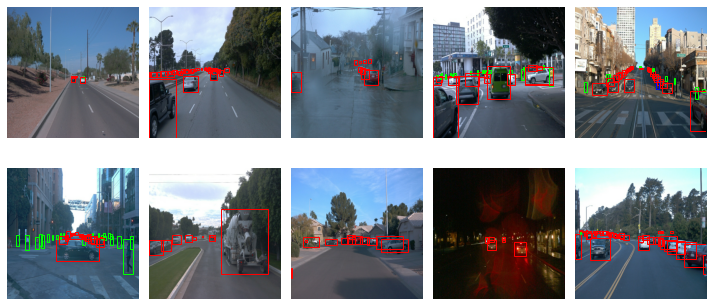

In [28]:
## STUDENT SOLUTION HERE

batch = dataset.shuffle(75).take(10)
display_instances(batch)

## Additional EDA

In this last part, you are free to perform any additional analysis of the dataset. What else would like to know about the data?
For example, think about data distribution. So far, you have only looked at a single file...

In [23]:
def get_classes_distribution(dataset):
    
    data_counter=0

    class Classes(Enum):
        CAR = 1
        PEDESTRIAN = 2
        BICYCLE = 4

    dataset_size = len(list(dataset))
    
    classes_distribution = []

    car_counter = 0
    pedestrian_counter = 0
    bicycle_counter = 0
    non_object_counter = 0
    
    for data in dataset:
        car = 0
        pedestrian = 0
        bicycle = 0
        non = 0
        
        for cl in zip(data['groundtruth_classes']):
                        
            if cl[0] == Classes.CAR.value:
                car += 1
            else:
                if cl[0] == Classes.PEDESTRIAN.value:
                    pedestrian += 1
                else:    
                    if cl[0] == Classes.BICYCLE.value:
                        bicycle += 1
                    else:
                        non += 1
                        
             
        data_counter += 1
    
        classes_distribution.append([car, pedestrian, bicycle, non])
    
        car_counter += car
        pedestrian_counter += pedestrian
        bicycle_counter += bicycle
        non_object_counter += non
        
    
    totals =  np.array([car_counter, pedestrian_counter, bicycle_counter, non_object_counter])
    distribution = np.array(classes_distribution)
    
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    labels = np.array(['Cars', 'Pedestrian', 'Bicycles', 'None'])
    ax.bar(labels, totals)

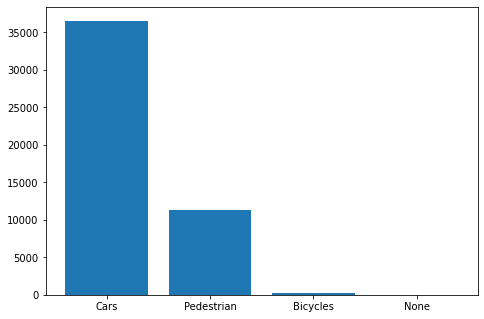

In [24]:
batch = dataset.take(2000)
get_classes_distribution(batch)

## Data distribution:

Data distribution taken from a sample of 2000 images we found

-***CARS***: the car class was the more common from the three clases, with over 35000 object founds for this class.   
-***PEDESTRIANS***: the pedestrina class was the second most common, appearing over 10000 times in the samples.   
-***Bycicles***: the bycicle class was the l